In [60]:
#sparksfoundation grip(internship)
#ullas Kumar Bherav
#data science intern
#task 3 exploratory data analysis on global terrorism

#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [61]:
#importing csv file
df=pd.read_csv(r'C:\Users\dell\Downloads\globalterrorismdb_0718dist.csv',encoding='ISO-8859-1')
df.head()

C:\Users\dell\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [62]:
#as file have 135 columns so i have copied required columns to make a new short data set
new=df[['eventid','iyear','imonth','iday','extended','country_txt','region_txt','city','latitude','specificity','summary','success','attacktype1_txt','targtype1_txt','target1','natlty1_txt','gname','motive','nperps','weaptype1_txt','nkill','nwound','nwoundte','ishostkid','nhostkid','region']].copy()
new.head()

,eventid,iyear,imonth,iday,extended,country_txt,region_txt,city,latitude,specificity,...,gname,motive,nperps,weaptype1_txt,nkill,nwound,nwoundte,ishostkid,nhostkid,region
0,197000000001,1970,7,2,0,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,1.0,...,MANO-D,NaN,NaN,Unknown,1.0,0.0,NaN,0.0,NaN,2
1,197000000002,1970,0,0,0,Mexico,North America,Mexico city,19.371887,1.0,...,23rd of September Communist League,NaN,7.0,Unknown,0.0,0.0,NaN,1.0,1.0,1
2,197001000001,1970,1,0,0,Philippines,Southeast Asia,Unknown,15.478598,4.0,...,Unknown,NaN,NaN,Unknown,1.0,0.0,NaN,0.0,NaN,5
3,197001000002,1970,1,0,0,Greece,Western Europe,Athens,37.997490,1.0,...,Unknown,NaN,NaN,Explosives,NaN,NaN,NaN,0.0,NaN,8
4,197001000003,1970,1,0,0,Japan,East Asia,Fukouka,33.580412,1.0,...,Unknown,NaN,NaN,Incendiary,NaN,NaN,NaN,0.0,NaN,4


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000233D17771F0>,
      dtype=object)

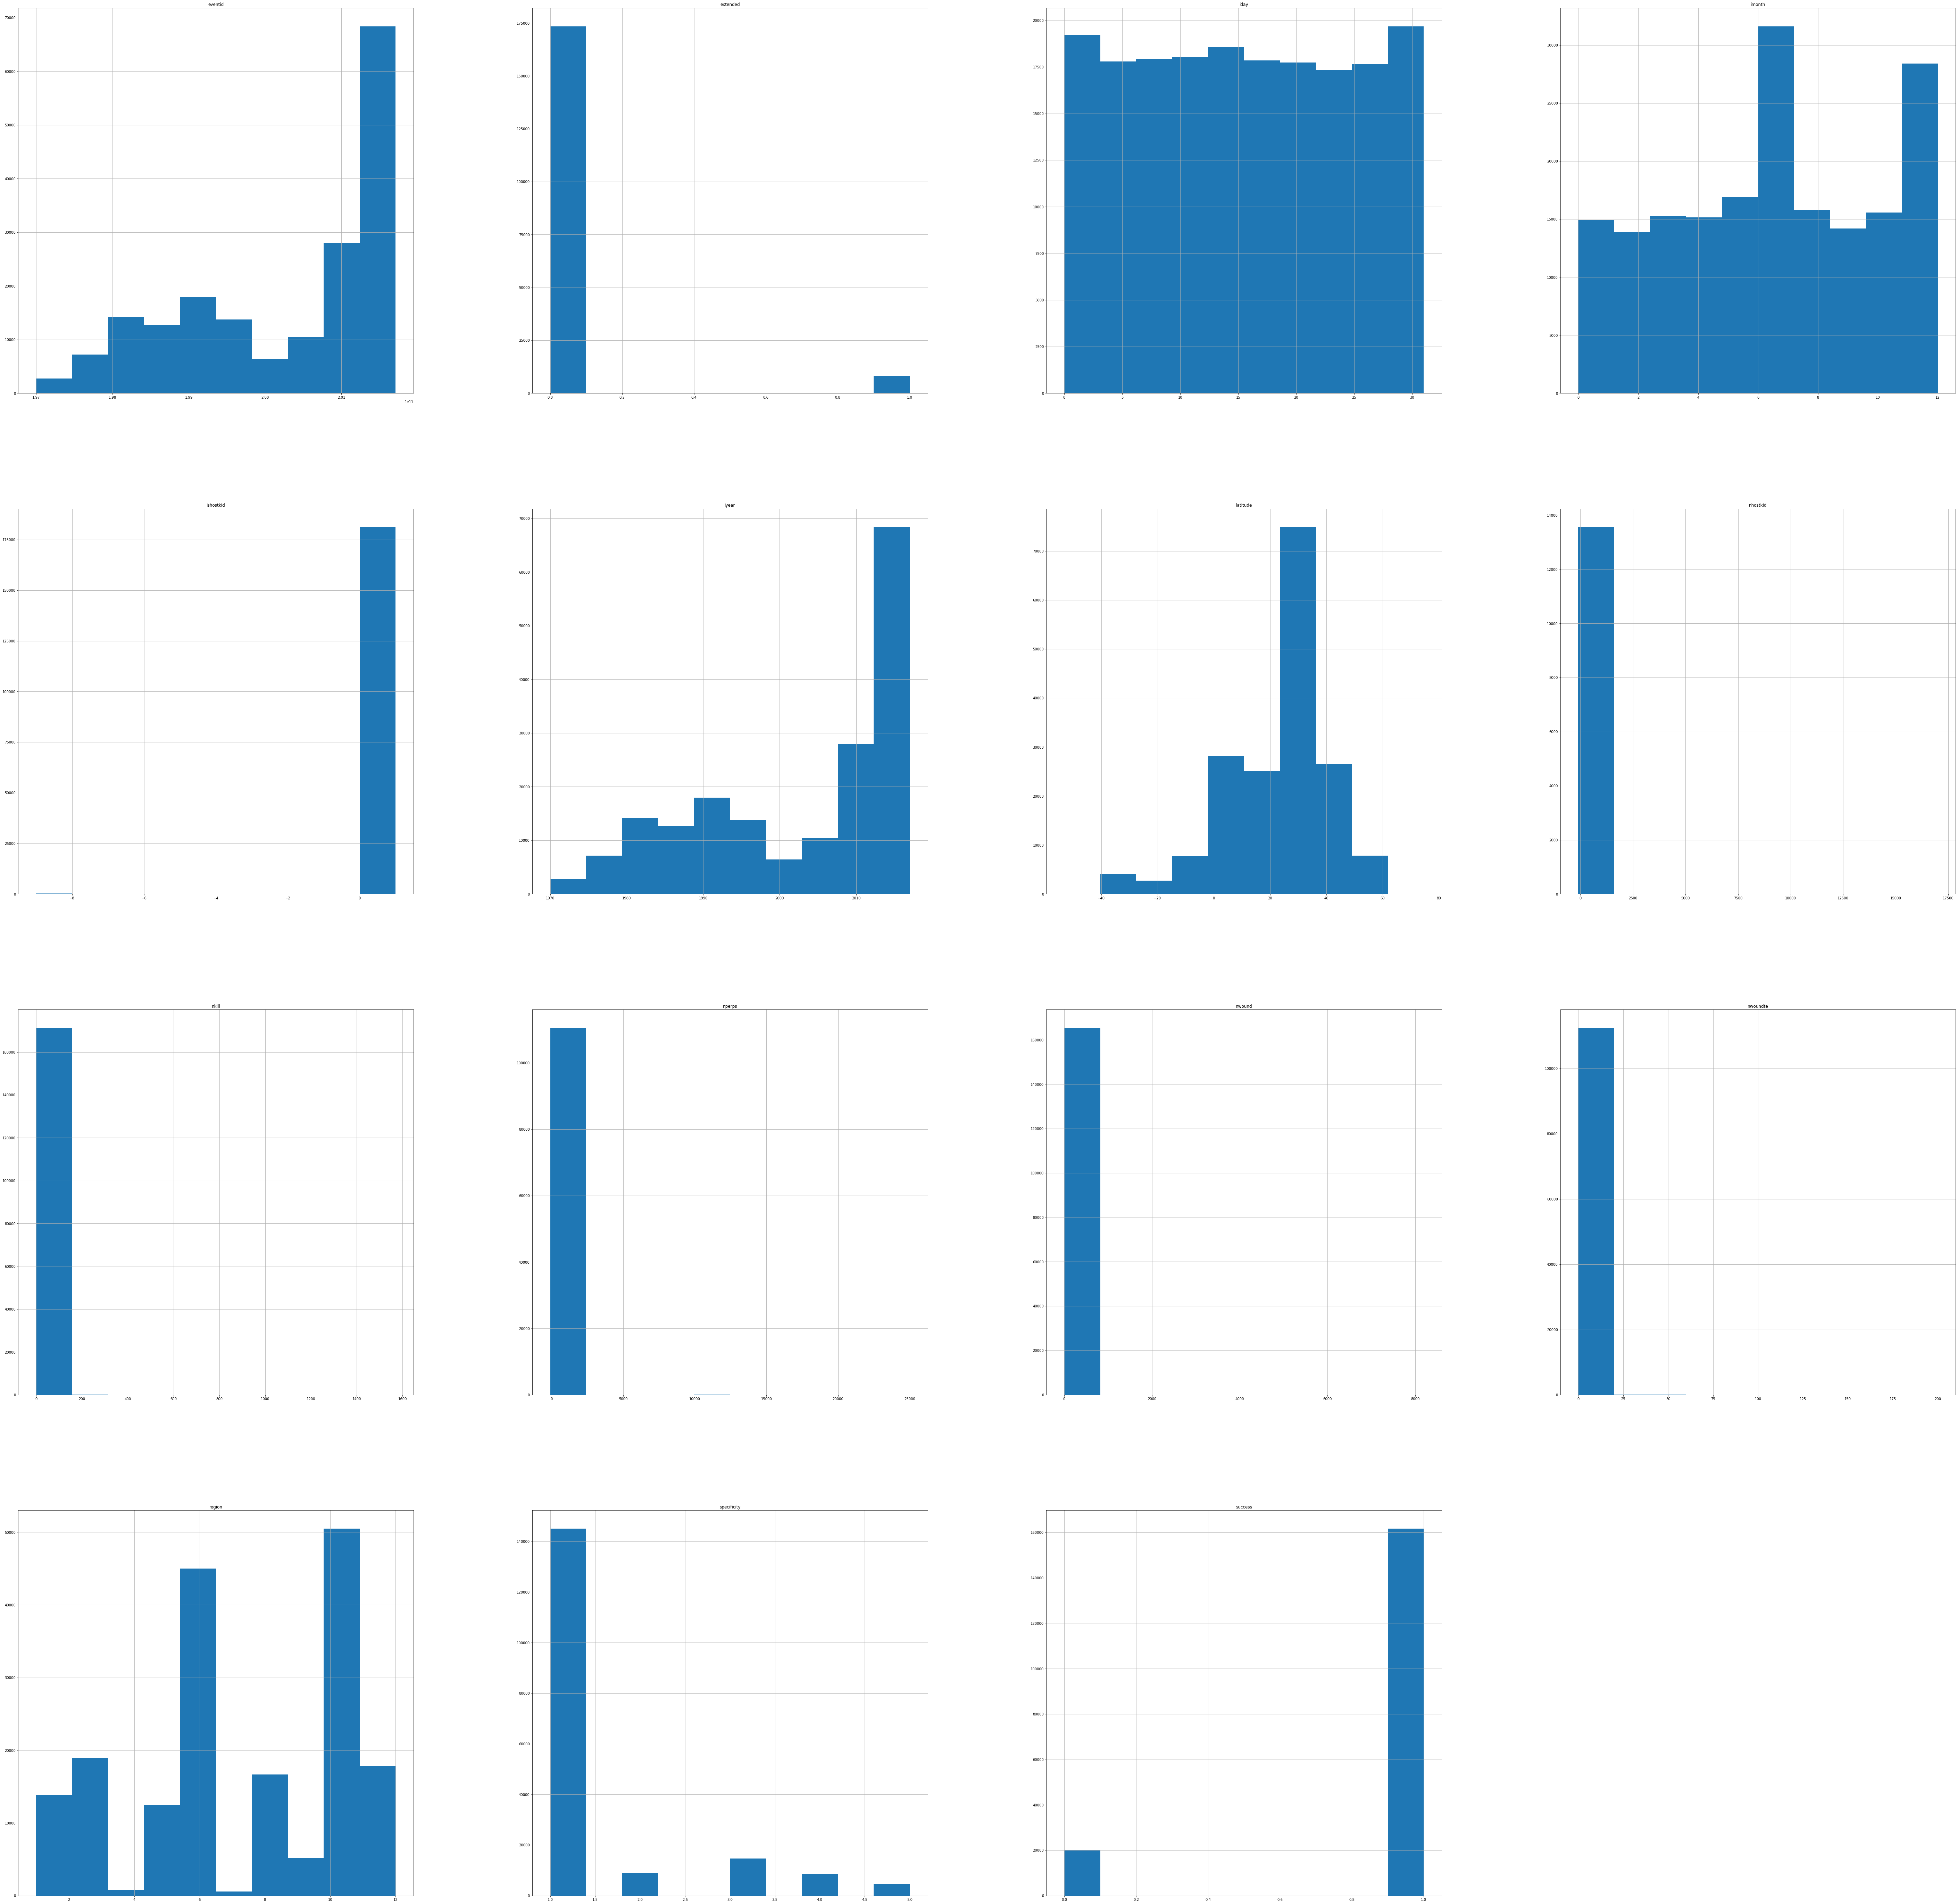

In [63]:
#ploting histogram
new.hist(figsize=(100,100))

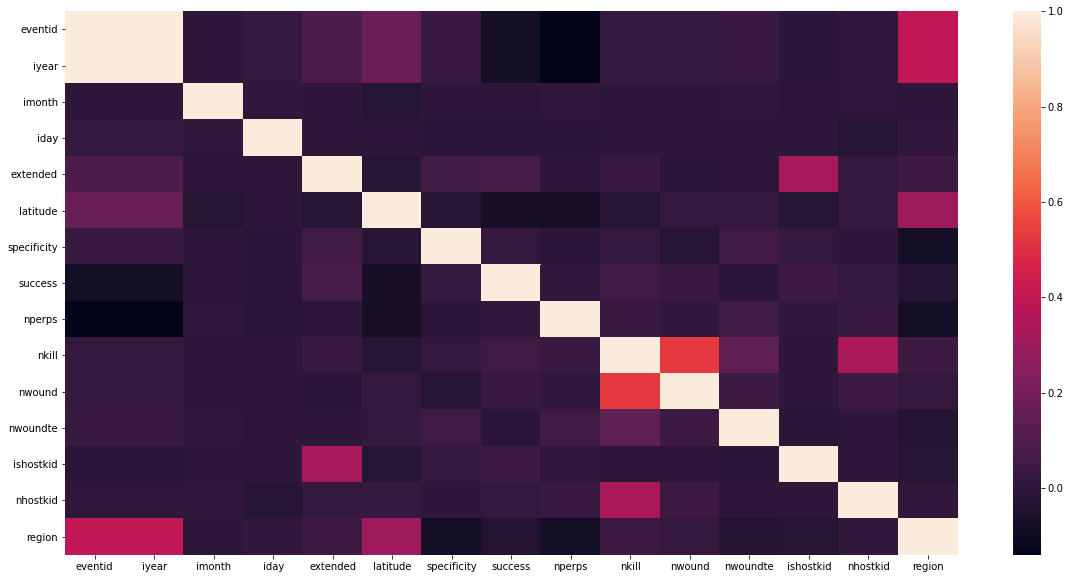

In [64]:
#checking correlation Analysis
plt.figure(figsize=(20,10))
sns.heatmap(np.round(new.corr(),2))

top terriost countries
 Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: country_txt, dtype: int64


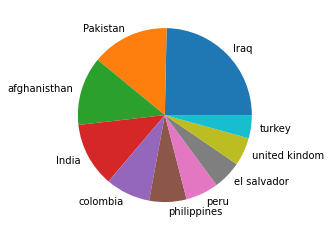

In [65]:
#printed top 10  countri with highest terriost cases
t_c=new["country_txt"].value_counts()[:10]
mylabels=["Iraq","Pakistan","afghanisthan","India","colombia","philippines","peru","el salvador","united kindom","turkey"]
print("top terriost countries\n",t_c)
plt.pie(t_c,labels=mylabels)

plt.show()

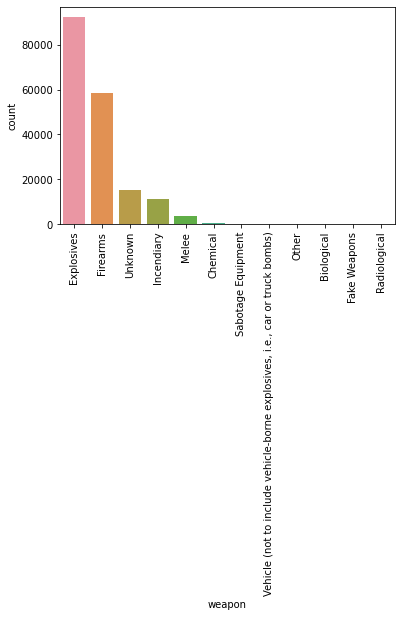

In [66]:
#graph about different weapons used
plt.plot(figsize=(10,5))
sns.countplot(new['weaptype1_txt'],order=new['weaptype1_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('weapon')
plt.show()

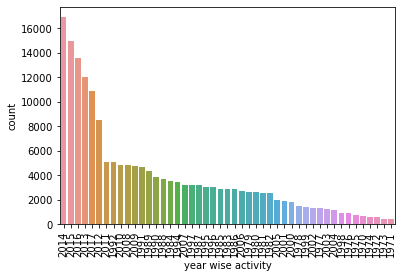

In [67]:
#year wise terriosm graph
plt.plot(figsize=(20,20))
sns.countplot(new['iyear'],order=new['iyear'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('year wise activity')
plt.show()

In [68]:
#attacks in 1970 & 2017
yr=df.iyear.value_counts().to_dict()
print(yr[1970],'attacts in 1970')
print(yr[2017],'attacks in 2017')

651 attacts in 1970
10900 attacks in 2017


In [69]:

min_count=new['iyear'].min()
min_id=new['iyear'].idxmin()
min_name=new['country_txt'][min_id]
max_count=new['iyear'].max()
max_id=new['iyear'].idxmax()
max_name=new['country_txt'][max_id]

In [70]:
print(max_name,'country suffered the most ')
print(min_name,'country suffered the less ')      

Afghanistan country suffered the most 
Dominican Republic country suffered the less 


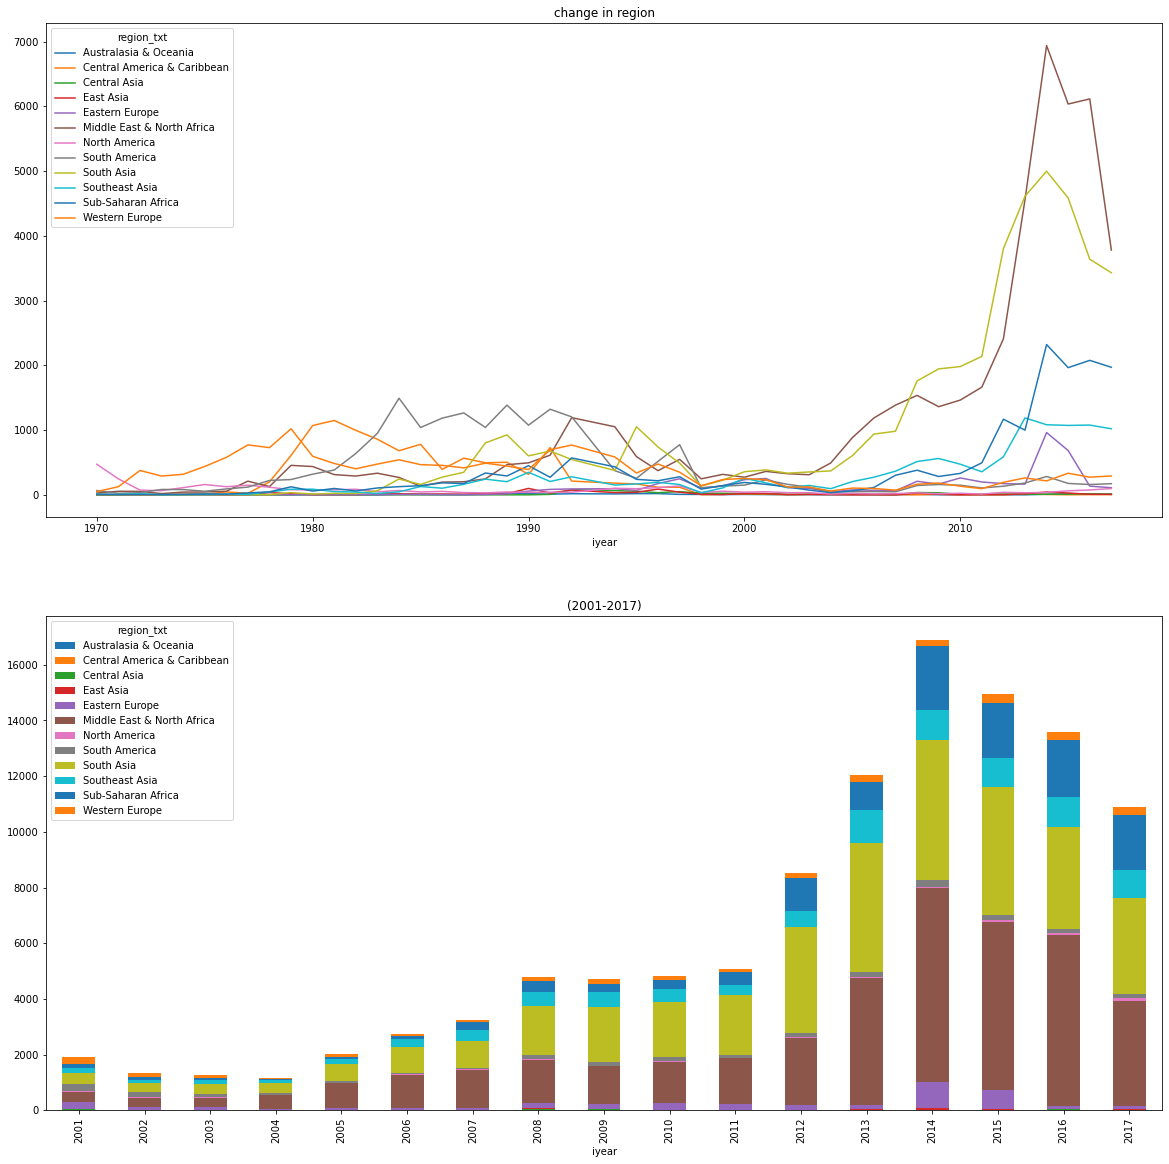

In [71]:
da=new[new['iyear']>=2001]
fig,ax=plt.subplots(figsize=(20,20),nrows=2,ncols=1)
ax[0]=pd.crosstab(new.iyear,new.region_txt).plot(ax=ax[0])
ax[0].set_title('change in region')
pd.crosstab(da.iyear,da.region_txt).plot.bar(stacked=True,ax=ax[1])
ax[1].set_title('(2001-2017)')
plt.show()

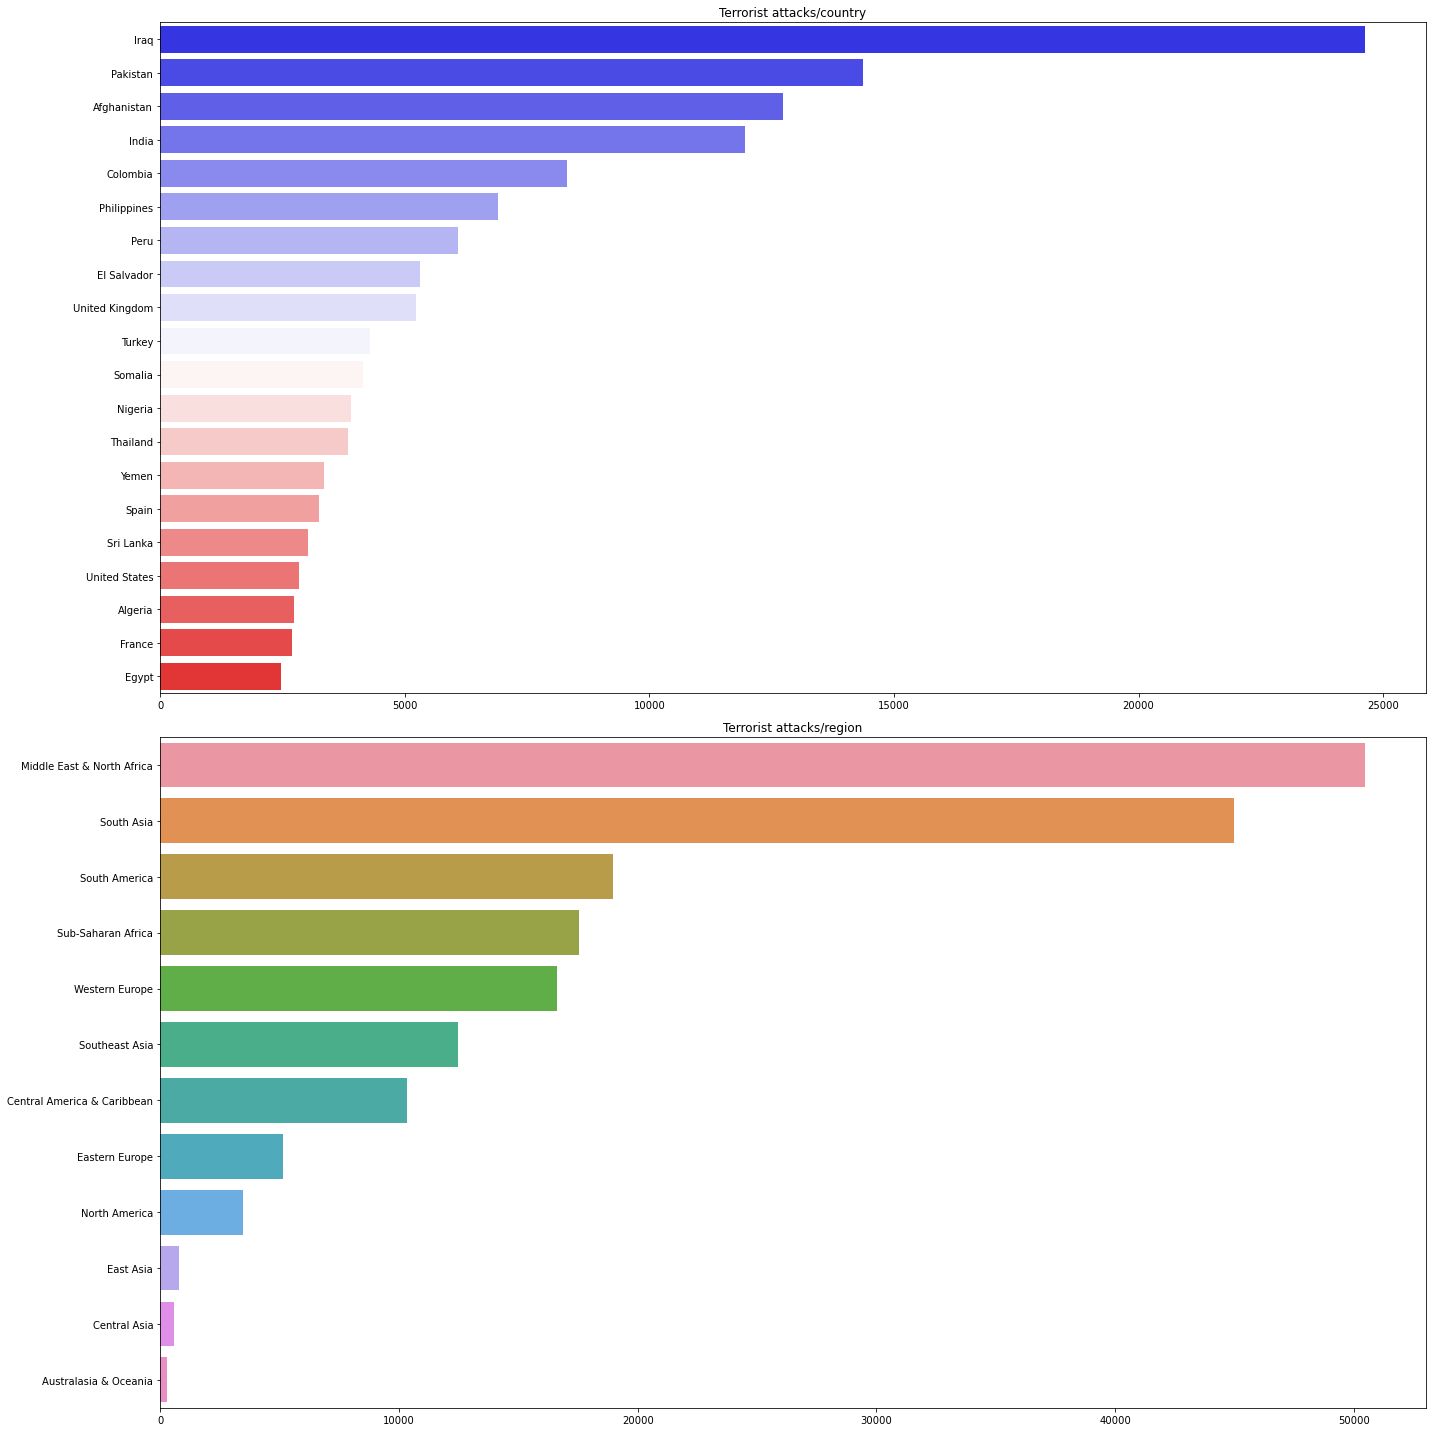

In [72]:
fig,ax=plt.subplots(figsize=(20,20),nrows=2,ncols=1)
sns.barplot(x=new['country_txt'].value_counts()[:20].values,y=new['country_txt'].value_counts()[:20].index,ax=ax[0],palette='bwr');
ax[0].set_title('Terrorist attacks/country')
sns.barplot(x=new['region_txt'].value_counts().values,y=new['region_txt'].value_counts().index,ax=ax[1]);
ax[1].set_title('Terrorist attacks/region')
fig.tight_layout()
plt.show()